### Question 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def svm(X, y,learning_rate=1,alpha=0.001,iterations=1000,print_step=False,draw_step=False):
    n_features = X.shape[1]

    y_ = np.where(y <= 0, -1, 1)

    w = np.zeros(n_features)
    b = 0

    count=0

    for _ in range(iterations):
        for i, x_i in enumerate(X):
            condition = y_[i] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= learning_rate * (2 * alpha * w)
            else:
                w -= learning_rate * (2 * alpha * w - np.dot(x_i, y_[i]))
                b -= learning_rate * y_[i]
            count+=1
        if(print_step):
            print(f"w={w}\nb={b}\n")
        if(draw_step):
            plot_decision_boundary(X,y,w,b,draw_step)
            # plot_points(X,y,axis=["",""])
            # plt.show()
    
    print(f"Iterations: {count}")
    return w,b

def predict(X,w,b):
    predicted=[]
    for x_i in X:
        predicted.append(np.sign(np.dot(x_i,w) - b))
    return np.array(predicted)

def accuracy(y_test,y_pred):
    bool_table=(y_test==y_pred)
    count=np.count_nonzero(bool_table==True)
    return count/len(bool_table)

def plot_points(X,y,axis):
    labels=np.unique(y)
    for i in labels:
        index=np.where(y==i)
        plt.scatter(X[index,0],X[index,1],label=f"Class {i}")
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

def plot_decision_boundary(X,y,w,b,draw_step=False,show_margin=True):
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = (-w[0] * x0_1 + b + 0) / w[1]
    x1_2 = (-w[0] * x0_2 + b + 0) / w[1]

    x1_1_m = (-w[0] * x0_1 + b - 1) / w[1]
    x1_2_m = (-w[0] * x0_2 + b - 1) / w[1]

    x1_1_p = (-w[0] * x0_1 + b + 1) / w[1]
    x1_2_p = (-w[0] * x0_2 + b + 1) / w[1]

    plt.ylim((np.amin(X[:,1])-1,np.amax(X[:,1]+1)))

    if(draw_step):
        plt.plot([x0_1, x0_2], [x1_1, x1_2],color="pink")
        if(show_margin):
            plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], color="grey",linestyle="dashed")
            plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], color="grey",linestyle="dashed")
    else:
        plt.plot([x0_1, x0_2], [x1_1, x1_2],label="Decision Boundary")
        if(show_margin):
            plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], color="black",linestyle="dashed",label="Margin")
            plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], color="black",linestyle="dashed")

,x1,x2,class
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


w=[2.00000e-07 3.99996e-07]
b=0.019999999999999997

w=[3.99984000e-07 7.99960001e-07]
b=0.04

w=[5.99952003e-07 1.19989201e-06]
b=0.060000000000000005

w=[7.99904008e-07 1.59979202e-06]
b=0.08

w=[9.99840018e-07 1.99966004e-06]
b=0.09999999999999999

w=[1.19976003e-06 2.39949607e-06]
b=0.11999999999999998

w=[1.39966405e-06 2.79930012e-06]
b=0.13999999999999999

w=[1.59955209e-06 3.19907218e-06]
b=0.16

w=[1.79942412e-06 3.59881226e-06]
b=0.18000000000000002

w=[1.99928018e-06 3.99852036e-06]
b=0.20000000000000004

w=[2.19912024e-06 4.39819649e-06]
b=0.22000000000000006

w=[2.39894431e-06 4.79784065e-06]
b=0.24000000000000005

w=[2.59875240e-06 5.19745283e-06]
b=0.26000000000000006

w=[2.79854451e-06 5.59703305e-06]
b=0.2800000000000001

w=[2.99832063e-06 5.99658130e-06]
b=0.3000000000000001

w=[3.19808077e-06 6.39609759e-06]
b=0.3200000000000001

w=[3.39782494e-06 6.79558191e-06]
b=0.34000000000000014

w=[3.59755312e-06 7.19503428e-06]
b=0.36000000000000015

w=[3.79726532e-06 7.594454

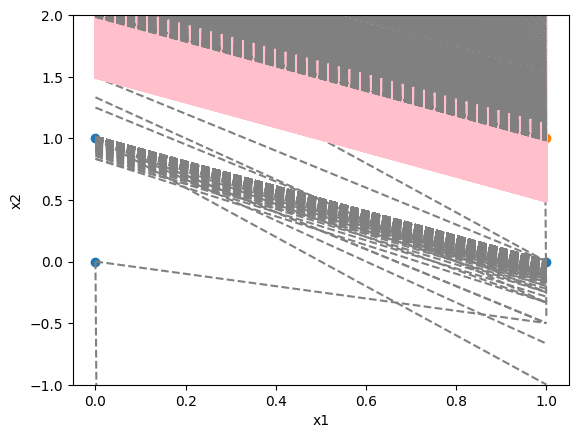

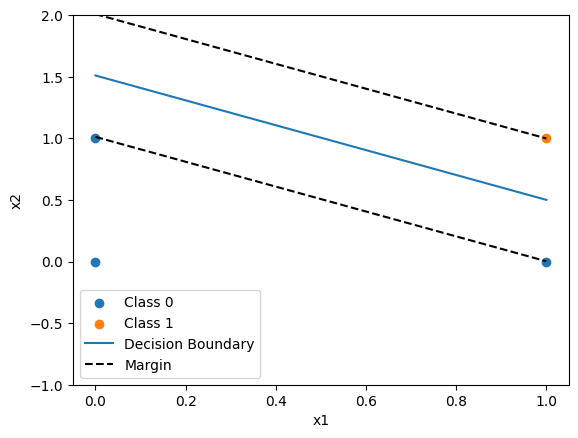

In [29]:
temp={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'class':[0,0,0,1]
}

df=pd.DataFrame(temp)
display(df)

X=df.drop(['class'],axis=1).to_numpy()
y=df['class'].to_numpy()

w,b=svm(X,y,learning_rate=0.01,print_step=True,draw_step=True)
plot_points(X,y,df.columns[0:-1])
plt.show()

plot_points(X,y,df.columns[0:-1])
plot_decision_boundary(X,y,w,b)
plt.legend()
plt.show()

### Question 2

,x1,x2,class
0,2,2,1
1,-1,-3,0
2,-1,2,1
3,0,-1,0
4,1,3,1
5,-1,-2,0
6,1,-2,0
7,-1,-1,1


Iterations: 8000


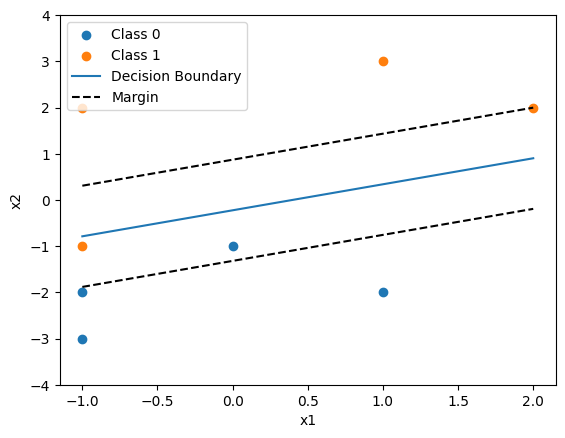

Iterations: 8000


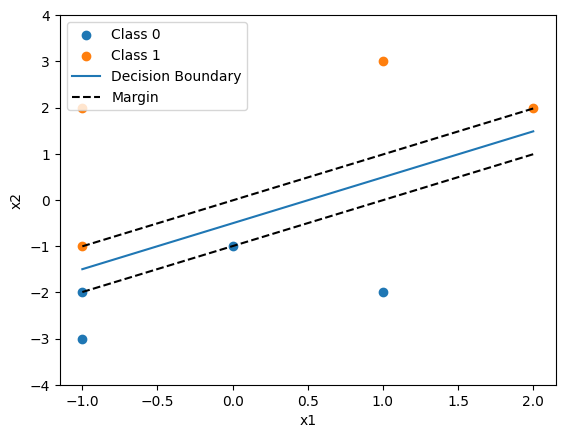

Iterations: 8000


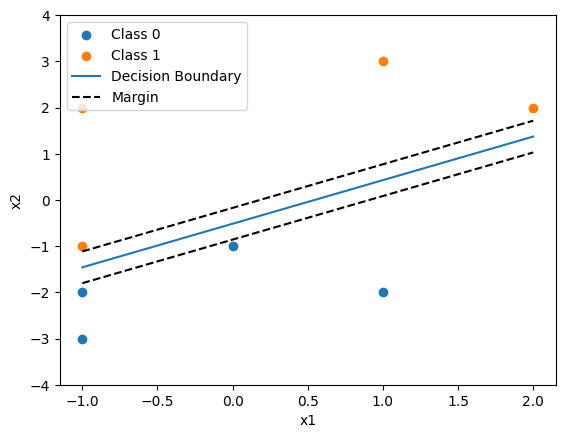

In [30]:
temp={
    'x1':[2,-1,-1,0,1,-1,1,-1],
    'x2':[2,-3,2,-1,3,-2,-2,-1],
    'class':[1,0,1,0,1,0,0,1]
}

df=pd.DataFrame(temp)
display(df)

X=df.drop(['class'],axis=1).to_numpy()
y=df['class'].to_numpy()

w,b=svm(X,y,learning_rate=0.001)
plot_points(X,y,df.columns[0:-1])
plot_decision_boundary(X,y,w,b)
plt.legend()
plt.show()

w,b=svm(X,y,learning_rate=0.01)
plot_points(X,y,df.columns[0:-1])
plot_decision_boundary(X,y,w,b)
plt.legend()
plt.show()

w,b=svm(X,y,learning_rate=0.5)
plot_points(X,y,df.columns[0:-1])
plot_decision_boundary(X,y,w,b)
plt.legend()
plt.show()

### Question 3

Iterations: 100000
Iterations: 100000
Iterations: 100000


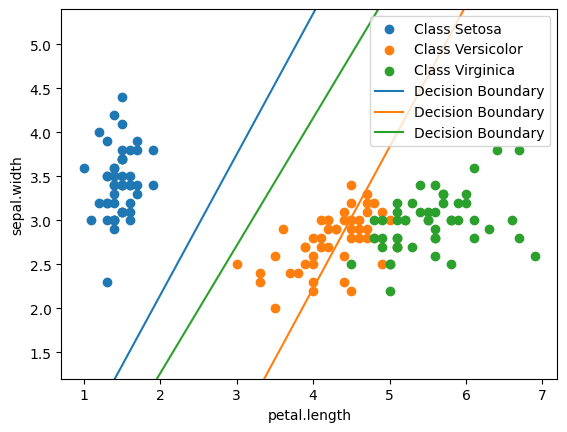

In [31]:
iris_df=pd.read_csv('./iris.csv')

iris_df=iris_df[['petal.length','sepal.width','variety']]

classes=iris_df['variety'].unique()
plot_points(iris_df.drop(['variety'],axis=1).to_numpy(),iris_df['variety'].to_numpy(),iris_df.columns[0:-1])

def svm_for_2_classes(class1,class2):
    group=iris_df.groupby(['variety'])
    temp_df=group.get_group((class1,))
    temp_df=pd.concat([temp_df,group.get_group((class2,))],axis=0)
    temp_X=temp_df.drop(['variety'],axis=1)
    temp_y=temp_df['variety'].copy()
    temp_classes=temp_y.unique()
    temp_y.loc[temp_y[temp_y==temp_classes[0]].index]=0
    temp_y.loc[temp_y[temp_y==temp_classes[1]].index]=1
    temp_X=temp_X.to_numpy()
    temp_y=temp_y.to_numpy()
    w,b=svm(temp_X,temp_y,learning_rate=0.01)
    plot_decision_boundary(temp_X,temp_y,w,b,show_margin=False)

svm_for_2_classes("Setosa","Versicolor")
svm_for_2_classes("Versicolor","Virginica")
svm_for_2_classes("Virginica","Setosa")
plt.legend()
plt.show()

### Question 4

In [32]:
train_df=pd.read_csv('./cv-train.txt',sep="  ",header=None,engine="python")
label_col=train_df.shape[1]-1
X_train=train_df.drop([label_col],axis=1).to_numpy()
y_train=train_df[label_col].to_numpy()

w,b=svm(X_train,y_train,learning_rate=0.001)

test_df=pd.read_csv('./cv-test.txt',sep="  ",header=None,engine="python")
label_col=test_df.shape[1]-1
X_test=test_df.drop([label_col],axis=1).to_numpy()
y_test=test_df[label_col].to_numpy()

y_pred=predict(X_test,w,b)
display(pd.DataFrame([y_pred,y_test],index=['Prediction','True']))
print(f"Accuracy = {accuracy(y_test,y_pred)*100}%")

Iterations: 200000


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Prediction,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0
True,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Accuracy = 84.0%
